Or if you are using **Google Collab** The **first work**  is to change the **runtime type to TPU or GPU** for **faster** competion of the project.
You can do it in following steps :

        Click on Runtime --> Change Runtime Type --> Change it to GPU or TPU 

# Getting the data :
      There are 3 steps -

                1. Connectiong with kaggle
                2. Downloading data
                3. Unzipping and others

As we are using a **kaggle dataset** to train and perdict we have to use a *docker* to connect kaggle with google collab.

So , we have to upload the API token taken from kaggle ( maybe named as kaggle.json) on the google collab notebook.
and then we have to repeat this 4 lines of code and then we can take the whole data into the collab.

* This lines are used for -
            1. Intsalling the docker.
            2. Connecting it with kaggle directory.
            3. Connecting the unique json for singular accessibility.
            4. Securing access on the notebook.

As we have linked the kaggle directory we can copy and paste any dataset's API command in the command lines. ( makes sure to write a '!' before pasting the command)

Now the data will be downloaded from kaggle to collab without getting a bypass.

 But it is in a .zip file . So we have to extract the actual file stored in folders.

In [1]:
!pip install -q kaggle

!mkdir -p ~/.kaggle
                                  
!cp kaggle.json ~/.kaggle/      #   (!cp [   API token file name   ] ~/.kaggle/)

!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d ashishpatel26/facial-expression-recognitionferchallenge

 92% 89.0M/96.6M [00:01<00:00, 61.6MB/s]
100% 96.6M/96.6M [00:01<00:00, 66.8MB/s]


In [3]:
from zipfile import ZipFile
zf = ZipFile('facial-expression-recognitionferchallenge.zip', 'r')
zf.extractall('/content')
zf.close()

In [4]:
# for data processing

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
import pandas as pd
import re
import os
import glob
import cv2

# for data pipeline --------------------

from sklearn.model_selection import train_test_split
from sklearn.metrics import*
import matplotlib.pyplot as plt
from sklearn.model_selection import*
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
import matplotlib.image as mpimg

# for prediction (machine learning models) ------------------------

from sklearn.linear_model import*
from sklearn.preprocessing import*
from sklearn.ensemble import*
from sklearn.neighbors import*
from sklearn import svm
from sklearn.naive_bayes import*
import xgboost as xgb

#deep learning libraries

import tensorflow as tf
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

# for confusion matrix plotting
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix,confusion_matrix

2.4.0


In [5]:
df=pd.read_csv('fer2013/fer2013/fer2013.csv')
df.head()

emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training

In [6]:
x=df['pixels']

In [7]:
arr=[]
for i in range(len(x)):
  p=list(x[i].split())
  for j in range(len(p)):
    p[j]=int(p[j])
    p[j]=p[j]/255.0
  arr.append(p)

In [8]:
arr=pd.DataFrame(arr)
arr.head()

0         1         2     ...      2301      2302      2303
0  0.274510  0.313725  0.321569  ...  0.415686  0.427451  0.321569
1  0.592157  0.588235  0.576471  ...  0.756863  0.717647  0.721569
2  0.905882  0.831373  0.611765  ...  0.345098  0.431373  0.596078
3  0.094118  0.125490  0.141176  ...  0.556863  0.560784  0.556863
4  0.015686  0.000000  0.000000  ...  0.117647  0.113725  0.117647

[5 rows x 2304 columns]

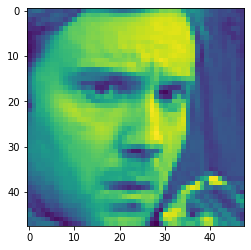

In [9]:
xx=arr.head(1)
xx=xx.to_numpy()
xx=xx.reshape(48,48)
plt.imshow(xx)

In [10]:
df.drop('pixels',1,inplace=True)

In [11]:
df.head()

emotion     Usage
0        0  Training
1        0  Training
2        2  Training
3        4  Training
4        6  Training

In [12]:
df=pd.concat([arr,df],axis=1)
df.head()

0         1         2  ...      2303  emotion     Usage
0  0.274510  0.313725  0.321569  ...  0.321569        0  Training
1  0.592157  0.588235  0.576471  ...  0.721569        0  Training
2  0.905882  0.831373  0.611765  ...  0.596078        2  Training
3  0.094118  0.125490  0.141176  ...  0.556863        4  Training
4  0.015686  0.000000  0.000000  ...  0.117647        6  Training

[5 rows x 2306 columns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Columns: 2306 entries, 0 to Usage
dtypes: float64(2304), int64(1), object(1)
memory usage: 631.4+ MB


In [14]:
df['Usage'].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [15]:
xxx=df[df['Usage']=='PrivateTest']
xxx['emotion'].value_counts()


3    879
6    626
4    594
2    528
0    491
5    416
1     55
Name: emotion, dtype: int64

In [16]:
xxx=df[df['Usage']=='PublicTest']
xxx['emotion'].value_counts()

3    895
4    653
6    607
2    496
0    467
5    415
1     56
Name: emotion, dtype: int64

In [17]:
train=df[df['Usage']=='Training']
val=df[df['Usage']=='PublicTest']
test=df[df['Usage']=='PrivateTest']

In [18]:
train.drop('Usage',1,inplace=True)
val.drop('Usage',1,inplace=True)
test.drop('Usage',1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [19]:
train.head()

0         1         2  ...      2302      2303  emotion
0  0.274510  0.313725  0.321569  ...  0.427451  0.321569        0
1  0.592157  0.588235  0.576471  ...  0.717647  0.721569        0
2  0.905882  0.831373  0.611765  ...  0.431373  0.596078        2
3  0.094118  0.125490  0.141176  ...  0.560784  0.556863        4
4  0.015686  0.000000  0.000000  ...  0.113725  0.117647        6

[5 rows x 2305 columns]

In [20]:
val.head()

0         1         2  ...      2302      2303  emotion
28709  0.996078  0.996078  0.996078  ...  0.505882  0.705882        0
28710  0.611765  0.721569  0.776471  ...  0.654902  0.631373        1
28711  0.270588  0.462745  0.239216  ...  0.341176  0.352941        4
28712  0.803922  0.796078  0.925490  ...  0.321569  0.337255        6
28713  0.341176  0.309804  0.290196  ...  0.133333  0.125490        3

[5 rows x 2305 columns]

In [21]:
test.head()

0         1         2  ...      2302      2303  emotion
32298  0.666667  0.462745  0.396078  ...  0.521569  0.513725        0
32299  0.027451  0.019608  0.031373  ...  0.223529  0.203922        5
32300  0.909804  0.941176  0.945098  ...  0.015686  0.035294        6
32301  0.784314  0.772549  0.584314  ...  0.129412  0.000000        4
32302  0.156863  0.109804  0.129412  ...  0.113725  0.101961        2

[5 rows x 2305 columns]

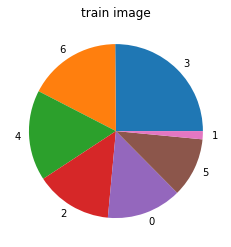

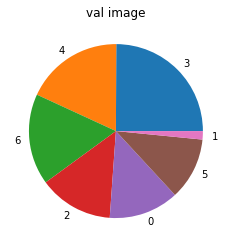

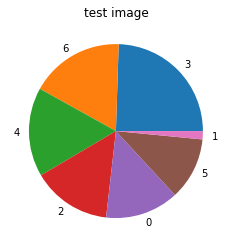

In [22]:
ar=train['emotion'].value_counts().values
arx=train['emotion'].value_counts().index
plt.title('train image')
plt.pie(ar,labels=arx)
plt.show()
ar=val['emotion'].value_counts().values
arx=val['emotion'].value_counts().index
plt.title('val image')
plt.pie(ar,labels=arx)
plt.show()
ar=test['emotion'].value_counts().values
arx=test['emotion'].value_counts().index
plt.title('test image')
plt.pie(ar,labels=arx)
plt.show()

We can see that the emotions are well tuned in each dataset. 

Still it is a problem that the emotions are not same in number in the datasets.

In [23]:
decoder=['anger', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']  # as per the data description

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


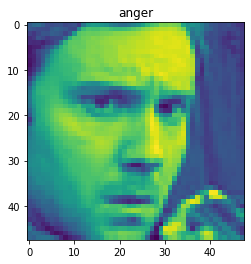

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


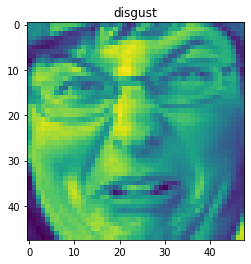

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


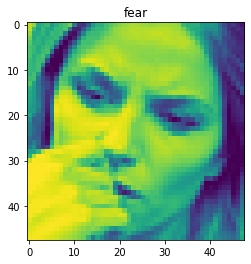

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


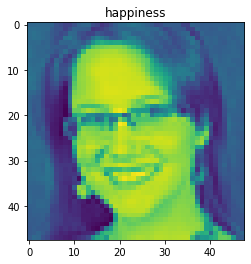

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


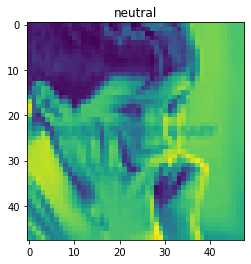

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


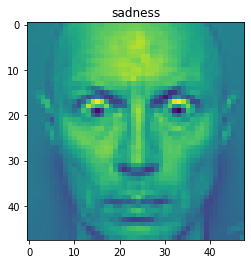

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


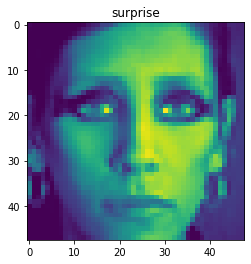

In [24]:
for i in range(7):
  xx=train[train['emotion']==i]
  image=xx.head(1)
  image.drop('emotion',1,inplace=True)
  image=image.to_numpy()
  image=image.reshape(48,48)
  plt.title(decoder[i])
  plt.imshow(image)
  plt.show()

We can see the different moods / emotions of the persons in here

In [25]:
train['emotion'].head(10)

0    0
1    0
2    2
3    4
4    6
5    2
6    4
7    3
8    3
9    2
Name: emotion, dtype: int64

Looks like the values has been well shuffled. So, we don't need any random shuffling, we can create the featureset and the target value.

In [26]:
X_train=train.drop('emotion',1)
y_train=train['emotion']
X_val=val.drop('emotion',1)
y_val=val['emotion']
X_test=test.drop('emotion',1)
y_test=test['emotion']

In [27]:
X_train=X_train.to_numpy()
X_val=X_val.to_numpy()
X_test=X_test.to_numpy()


In [28]:
X_train.shape,X_val.shape,X_test.shape

((28709, 2304), (3589, 2304), (3589, 2304))

In [29]:
X_train=X_train.reshape(28709,48,48,1)
X_val=X_val.reshape(3589,48,48,1)
X_test=X_test.reshape(3589,48,48,1)

In [30]:
y_train=y_train.to_numpy()
y_val=y_val.to_numpy()
y_test=y_test.to_numpy()
y_train=y_train.reshape(28709,1)
y_val=y_val.reshape(3589,1)
y_test=y_test.reshape(3589,1)

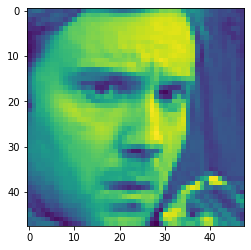

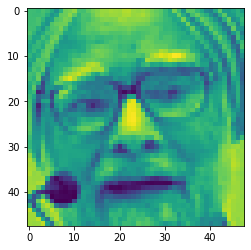

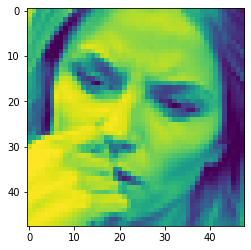

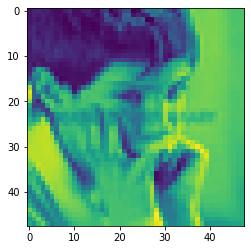

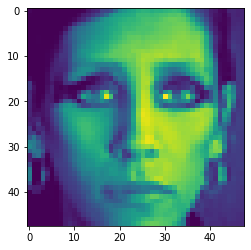

In [31]:
for i in range(5):
  plt.imshow(X_train[i].reshape(48,48))
  plt.show()

In [32]:
model=Sequential()

model.add(Conv2D(64,activation='relu',kernel_size=(3,3),input_shape=X_train[0].shape))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(7,activation='softmax'))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
dense (Dense)                (None, 46, 46, 64)        4160      
_________________________________________________________________
dropout (Dropout)            (None, 46, 46, 64)        0         
_________________________________________________________________
dense_1 (Dense)              (None, 46, 46, 64)        4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 46, 46, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 135424)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1

In [34]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [35]:
hist=model.fit(X_train,y_train,batch_size=10,epochs=10,verbose=1,validation_data=(X_val,y_val))

Epoch 1/10
2871/2871 [==============================] - 35s 10ms/step - loss: 1.7457 - accuracy: 0.2967 - val_loss: 1.5354 - val_accuracy: 0.3998
Epoch 2/10
2871/2871 [==============================] - 27s 9ms/step - loss: 1.4628 - accuracy: 0.4355 - val_loss: 1.4425 - val_accuracy: 0.4452
Epoch 3/10
2871/2871 [==============================] - 27s 9ms/step - loss: 1.2861 - accuracy: 0.5070 - val_loss: 1.4062 - val_accuracy: 0.4550
Epoch 4/10
2871/2871 [==============================] - 27s 9ms/step - loss: 1.1126 - accuracy: 0.5727 - val_loss: 1.4265 - val_accuracy: 0.4614
Epoch 5/10
2871/2871 [==============================] - 27s 9ms/step - loss: 0.9406 - accuracy: 0.6510 - val_loss: 1.4890 - val_accuracy: 0.4670
Epoch 6/10
2871/2871 [==============================] - 27s 9ms/step - loss: 0.8083 - accuracy: 0.7004 - val_loss: 1.6264 - val_accuracy: 0.4751
Epoch 7/10
2871/2871 [==============================] - 27s 9ms/step - loss: 0.6788 - accuracy: 0.7510 - val_loss: 1.7974 - val_a

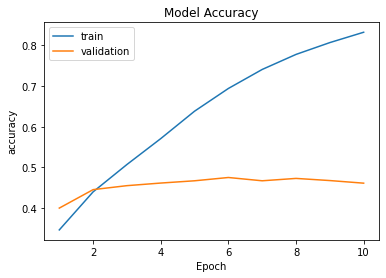

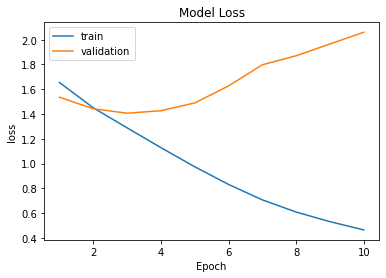

In [36]:
plt.title('Model Accuracy')
plt.plot(range(1,11),hist.history['accuracy'])
plt.plot(range(1,11),hist.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(labels=['train','validation'])
plt.show()

plt.title('Model Loss')
plt.plot(range(1,11),hist.history['loss'])
plt.plot(range(1,11),hist.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(labels=['train','validation'])
plt.show()

In [37]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=X_train[0].shape))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))     

model.add(Flatten())                  
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7,activation='softmax'))   

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 22, 22, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 30976)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               3965056   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [39]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [40]:
hist=model.fit(X_train,y_train,batch_size=10,epochs=10,verbose=1,validation_data=(X_val,y_val))

Epoch 1/10
2871/2871 [==============================] - 12s 4ms/step - loss: 1.7787 - accuracy: 0.2726 - val_loss: 1.4752 - val_accuracy: 0.4330
Epoch 2/10
2871/2871 [==============================] - 12s 4ms/step - loss: 1.5075 - accuracy: 0.4111 - val_loss: 1.3798 - val_accuracy: 0.4703
Epoch 3/10
2871/2871 [==============================] - 12s 4ms/step - loss: 1.4006 - accuracy: 0.4657 - val_loss: 1.3398 - val_accuracy: 0.4943
Epoch 4/10
2871/2871 [==============================] - 12s 4ms/step - loss: 1.3269 - accuracy: 0.4892 - val_loss: 1.3364 - val_accuracy: 0.4943
Epoch 5/10
2871/2871 [==============================] - 11s 4ms/step - loss: 1.2811 - accuracy: 0.5060 - val_loss: 1.3402 - val_accuracy: 0.4896
Epoch 6/10
2871/2871 [==============================] - 11s 4ms/step - loss: 1.2151 - accuracy: 0.5331 - val_loss: 1.3220 - val_accuracy: 0.4996
Epoch 7/10
2871/2871 [==============================] - 11s 4ms/step - loss: 1.1741 - accuracy: 0.5445 - val_loss: 1.3131 - val_ac

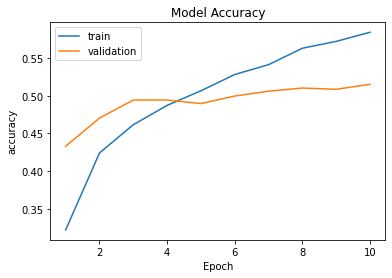

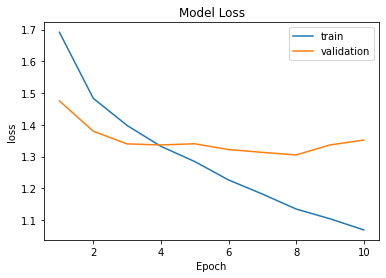

In [41]:
plt.title('Model Accuracy')
plt.plot(range(1,11),hist.history['accuracy'])
plt.plot(range(1,11),hist.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(labels=['train','validation'])
plt.show()

plt.title('Model Loss')
plt.plot(range(1,11),hist.history['loss'])
plt.plot(range(1,11),hist.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(labels=['train','validation'])
plt.show()

In [42]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=X_train[0].shape))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))     
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(Flatten())                  
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7,activation='softmax'))  

In [43]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [44]:
hist=model.fit(X_train,y_train,batch_size=10,epochs=10,verbose=1,validation_data=(X_val,y_val))

Epoch 1/10
2871/2871 [==============================] - 11s 4ms/step - loss: 1.7924 - accuracy: 0.2698 - val_loss: 1.5218 - val_accuracy: 0.4202
Epoch 2/10
2871/2871 [==============================] - 10s 3ms/step - loss: 1.5673 - accuracy: 0.3872 - val_loss: 1.4335 - val_accuracy: 0.4572
Epoch 3/10
2871/2871 [==============================] - 10s 3ms/step - loss: 1.4435 - accuracy: 0.4445 - val_loss: 1.3823 - val_accuracy: 0.4558
Epoch 4/10
2871/2871 [==============================] - 10s 3ms/step - loss: 1.3743 - accuracy: 0.4677 - val_loss: 1.3108 - val_accuracy: 0.4951
Epoch 5/10
2871/2871 [==============================] - 10s 3ms/step - loss: 1.3101 - accuracy: 0.5003 - val_loss: 1.3044 - val_accuracy: 0.5010
Epoch 6/10
2871/2871 [==============================] - 10s 3ms/step - loss: 1.2322 - accuracy: 0.5310 - val_loss: 1.2985 - val_accuracy: 0.5077
Epoch 7/10
2871/2871 [==============================] - 10s 3ms/step - loss: 1.1755 - accuracy: 0.5465 - val_loss: 1.2978 - val_ac

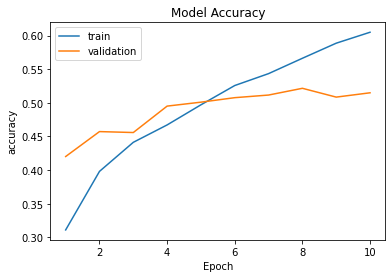

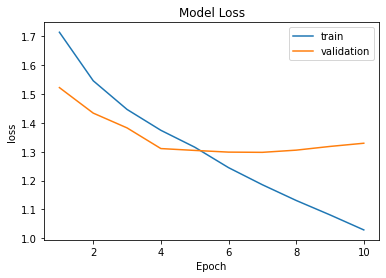

In [45]:
plt.title('Model Accuracy')
plt.plot(range(1,11),hist.history['accuracy'])
plt.plot(range(1,11),hist.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(labels=['train','validation'])
plt.show()

plt.title('Model Loss')
plt.plot(range(1,11),hist.history['loss'])
plt.plot(range(1,11),hist.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(labels=['train','validation'])
plt.show()

In [46]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=X_train[0].shape))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7,activation='softmax'))



In [47]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 44, 44, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 18, 18, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 9, 9, 64)         

In [48]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [49]:
hist=model.fit(X_train,y_train,batch_size=10,epochs=10,verbose=1,validation_data=(X_val,y_val))

Epoch 1/10
2871/2871 [==============================] - 11s 4ms/step - loss: 1.7962 - accuracy: 0.2553 - val_loss: 1.5656 - val_accuracy: 0.3954
Epoch 2/10
2871/2871 [==============================] - 10s 4ms/step - loss: 1.5872 - accuracy: 0.3808 - val_loss: 1.4266 - val_accuracy: 0.4514
Epoch 3/10
2871/2871 [==============================] - 10s 4ms/step - loss: 1.4758 - accuracy: 0.4280 - val_loss: 1.3425 - val_accuracy: 0.4781
Epoch 4/10
2871/2871 [==============================] - 10s 4ms/step - loss: 1.3944 - accuracy: 0.4624 - val_loss: 1.3016 - val_accuracy: 0.5077
Epoch 5/10
2871/2871 [==============================] - 10s 4ms/step - loss: 1.3485 - accuracy: 0.4809 - val_loss: 1.2649 - val_accuracy: 0.5138
Epoch 6/10
2871/2871 [==============================] - 10s 4ms/step - loss: 1.3178 - accuracy: 0.4930 - val_loss: 1.2637 - val_accuracy: 0.5130
Epoch 7/10
2871/2871 [==============================] - 10s 4ms/step - loss: 1.2867 - accuracy: 0.5022 - val_loss: 1.2165 - val_ac

This model is working very good. we are going to increase the epoch and check again.

In [50]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=X_train[0].shape))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7,activation='softmax'))



In [51]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [52]:
hist=model.fit(X_train,y_train,batch_size=10,epochs=20,verbose=1,validation_data=(X_val,y_val))

Epoch 1/20
2871/2871 [==============================] - 11s 4ms/step - loss: 1.7887 - accuracy: 0.2670 - val_loss: 1.5250 - val_accuracy: 0.3954
Epoch 2/20
2871/2871 [==============================] - 10s 4ms/step - loss: 1.5588 - accuracy: 0.3903 - val_loss: 1.3969 - val_accuracy: 0.4767
Epoch 3/20
2871/2871 [==============================] - 10s 4ms/step - loss: 1.4349 - accuracy: 0.4433 - val_loss: 1.3120 - val_accuracy: 0.5040
Epoch 4/20
2871/2871 [==============================] - 10s 4ms/step - loss: 1.3666 - accuracy: 0.4719 - val_loss: 1.2922 - val_accuracy: 0.5104
Epoch 5/20
2871/2871 [==============================] - 10s 4ms/step - loss: 1.3071 - accuracy: 0.5019 - val_loss: 1.2466 - val_accuracy: 0.5291
Epoch 6/20
2871/2871 [==============================] - 10s 4ms/step - loss: 1.2748 - accuracy: 0.5122 - val_loss: 1.2076 - val_accuracy: 0.5405
Epoch 7/20
2871/2871 [==============================] - 10s 4ms/step - loss: 1.2457 - accuracy: 0.5213 - val_loss: 1.1956 - val_ac

Now going to increase the batch size and increase the epoch again.

In [53]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=X_train[0].shape))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7,activation='softmax'))



In [54]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [55]:
hist=model.fit(X_train,y_train,batch_size=20,epochs=30,verbose=1,validation_data=(X_val,y_val))

Epoch 1/30
1436/1436 [==============================] - 7s 5ms/step - loss: 1.7849 - accuracy: 0.2606 - val_loss: 1.5035 - val_accuracy: 0.4260
Epoch 2/30
1436/1436 [==============================] - 7s 5ms/step - loss: 1.5281 - accuracy: 0.4018 - val_loss: 1.3541 - val_accuracy: 0.4907
Epoch 3/30
1436/1436 [==============================] - 7s 5ms/step - loss: 1.3841 - accuracy: 0.4630 - val_loss: 1.2739 - val_accuracy: 0.5135
Epoch 4/30
1436/1436 [==============================] - 7s 5ms/step - loss: 1.3193 - accuracy: 0.4913 - val_loss: 1.2384 - val_accuracy: 0.5294
Epoch 5/30
1436/1436 [==============================] - 7s 5ms/step - loss: 1.2692 - accuracy: 0.5099 - val_loss: 1.2158 - val_accuracy: 0.5322
Epoch 6/30
1436/1436 [==============================] - 7s 5ms/step - loss: 1.2149 - accuracy: 0.5361 - val_loss: 1.1858 - val_accuracy: 0.5511
Epoch 7/30
1436/1436 [==============================] - 7s 5ms/step - loss: 1.1950 - accuracy: 0.5402 - val_loss: 1.1899 - val_accuracy:

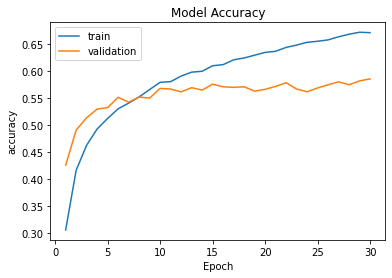

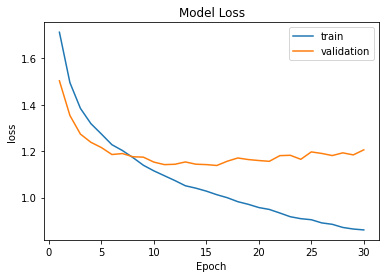

In [56]:
plt.title('Model Accuracy')
plt.plot(range(1,31),hist.history['accuracy'])
plt.plot(range(1,31),hist.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(labels=['train','validation'])
plt.show()

plt.title('Model Loss')
plt.plot(range(1,31),hist.history['loss'])
plt.plot(range(1,31),hist.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(labels=['train','validation'])
plt.show()

The model is slightly overfitted with the train.

# Deployment on the hidden test:
---



In [57]:
prediction=model.predict(X_test)

y_pred=[]
for i in range(len(prediction)):
  y_pred.append(np.argmax(prediction[i]))

print('acuuracy on the hidden test :',accuracy_score(y_test,y_pred))

acuuracy on the hidden test : 0.5756478127612148


The accuracy is not much . still we have an approximately well tuned data.



Predicted Expression  surprise


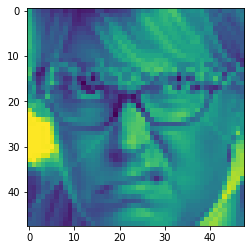



Predicted Expression  neutral


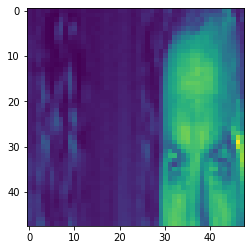



Predicted Expression  anger


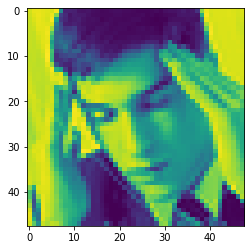



Predicted Expression  neutral


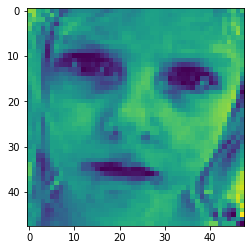



Predicted Expression  neutral


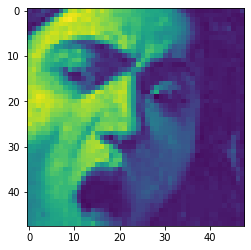



Predicted Expression  anger


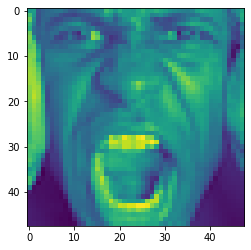



Predicted Expression  neutral


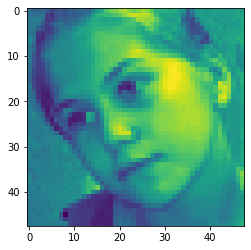



Predicted Expression  happiness


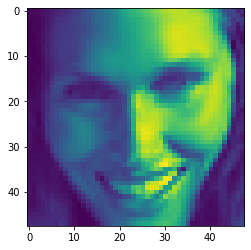



Predicted Expression  fear


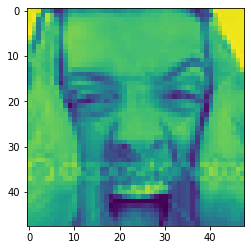



Predicted Expression  happiness


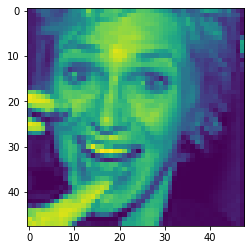

In [62]:

for i in range(10):
  print('\n\nPredicted Expression ',decoder[y_pred[i]])
  plt.imshow(X_test[i].reshape(48,48))
  plt.show()

Plotting Confusion Matrix :
---

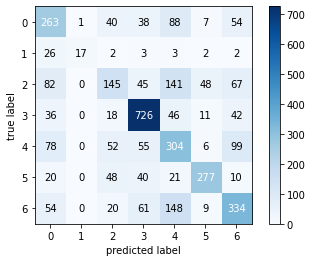

In [63]:
mat=confusion_matrix(y_test,y_pred)
plot_confusion_matrix(mat,colorbar=True)
plt.show()

In [64]:
sample_submission=pd.read_csv('Submission.csv')
sample_submission.head(5)

3
0  4
1  0
2  4
3  3
4  3

Creating final submission :
---

In [65]:
final_submission=pd.DataFrame({'3':y_pred})
final_submission.to_csv('final_submission.csv',index=False)

In [66]:
final_submission.head()

3
0  6
1  4
2  0
3  4
4  4

It is in right format. 

# THE END :)